In [123]:
pip install catboost

     |████████████████████████████████| 69.2 MB 64 kB/s  eta 0:00:01    |█                               | 2.1 MB 195 kB/s eta 0:05:43     |██                              | 4.2 MB 1.0 MB/s eta 0:01:04     |███▋                            | 7.8 MB 2.8 MB/s eta 0:00:23     |████▉                           | 10.5 MB 2.0 MB/s eta 0:00:29     |█████▌                          | 11.9 MB 2.0 MB/s eta 0:00:29     |██████▋                         | 14.3 MB 621 kB/s eta 0:01:29     |█████████▎                      | 20.0 MB 5.5 MB/s eta 0:00:09     |█████████████▍                  | 29.0 MB 1.4 MB/s eta 0:00:30     |█████████████▉                  | 30.0 MB 6.3 MB/s eta 0:00:07     |████████████████████▋           | 44.5 MB 1.0 MB/s eta 0:00:24     |█████████████████████           | 45.3 MB 1.0 MB/s eta 0:00:24     |████████████████████████▍       | 52.8 MB 2.6 MB/s eta 0:00:07     |█████████████████████████▎      | 54.6 MB 1.2 MB/s eta 0:00:13     |███████████████████████████▏    | 58.7 MB 2.0 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier

In [2]:
files = os.listdir()
files

['2131420.csv',
 '5764225.csv',
 '716611.csv',
 '12310406.csv',
 '6155412.csv',
 '107794104.csv',
 '7116202.csv',
 '312001A.csv',
 '67054102.csv',
 '3152903.csv',
 '22331015.csv',
 '5754004.csv',
 '65115456.csv',
 '12200013.csv',
 '32202581.csv',
 '10759006.csv',
 '1019605.csv',
 '6155512.csv',
 '17007218.csv',
 '716511.csv',
 '17504128.csv',
 '4153203.csv',
 '87479103.csv',
 '6215816.csv',
 '10149903.csv',
 '57449125.csv',
 '27510125.csv',
 '3832715.csv',
 '97284126.csv',
 '8767704.csv',
 '615311.csv',
 '2761506.csv',
 '15110552.csv',
 '5744514.csv',
 '5614861.csv',
 '75116556.csv',
 '8737413.csv',
 '1140126.csv',
 '3112516.csv',
 '25331163.csv',
 '95108752.csv',
 '45637114.csv',
 '2211902.csv',
 '54261.csv',
 '5744414.csv',
 '2141713.csv',
 '27515103.csv',
 '.ipynb_checkpoints',
 '59043151.csv',
 '3752504.csv',
 '5114502.csv',
 '57245109.csv',
 '5154904.csv',
 '35302247.csv',
 '47637114.csv',
 '15110252.csv',
 '10149525.csv',
 '57443114.csv',
 '4813715.csv',
 '9118402.csv',
 '4240341

In [4]:
d = pd.read_csv(files[0], sep=';')
d1 = []
for i in files:
    if '.ipynb_checkpoints' in i: 
        continue
    if 'catboost_info' in i: 
        continue
    if '.git' in i:
        continue
    if 'well.ipynb' in i:
        continue
    if 'well_multi.ipynb' in i:
        continue
    
    
    d = pd.concat([d, pd.read_csv(i, sep=';')], ignore_index=True)
    

    


In [5]:
d

,Echosounder.CasingHeadPressure,Echosounder.FluidLevel,ESP.DecelerationTime,ESP.Frequency,ESP.Frequency.SP,ESP.IntakePressure,ESP.IntakeTemperature,ESP.Mode,ESP.Motor.ActivePower,ESP.Motor.Current.Active,...,diff_ESP.Frequency,diff_ESP.Motor.CurrentUnbalance,diff_ESP.Motor.Load,diff_ESP.Motor.Resistance,diff_ESP.Motor.Temperature,diff_ESP.Motor.VoltageUnbalance,diff_ESP.TurbineFrequency,diff_ESP.RatedVoltage,Power,ESP.PHI
0,NaN,NaN,NaN,52.4,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1,NaN,NaN,NaN,52.4,NaN,NaN,89.0,NaN,NaN,NaN,...,-52.4,NaN,NaN,-6439.198101,-114.0,NaN,NaN,-300.0,0.000000,NaN
2,NaN,NaN,NaN,52.4,NaN,NaN,89.0,NaN,NaN,NaN,...,-52.4,NaN,NaN,-6539.114862,-114.0,NaN,NaN,-300.0,0.000000,NaN
3,NaN,NaN,NaN,52.4,NaN,NaN,89.0,NaN,NaN,NaN,...,-52.4,NaN,NaN,-6630.967593,-114.0,NaN,NaN,-300.0,0.000000,NaN
4,NaN,NaN,NaN,52.4,NaN,NaN,89.0,NaN,NaN,NaN,...,-52.4,NaN,NaN,-6560.415598,-114.0,NaN,NaN,-300.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217433,NaN,NaN,NaN,54.8,NaN,76.465741,88.0,NaN,NaN,NaN,...,-54.8,19.0,-18.135417,-9969.000000,-105.0,NaN,NaN,-300.0,35637.487937,NaN
217434,NaN,NaN,NaN,54.8,NaN,76.560000,88.0,NaN,NaN,NaN,...,-54.8,19.0,-18.046349,-9969.000000,-105.0,NaN,NaN,-300.0,35549.038880,NaN
217435,NaN,NaN,NaN,54.8,NaN,76.770833,88.0,NaN,NaN,NaN,...,-54.8,19.0,-18.236667,-9969.000000,-105.0,NaN,NaN,-300.0,35496.575050,NaN
217436,NaN,NaN,NaN,54.8,NaN,76.665000,88.0,NaN,NaN,NaN,...,-54.8,19.0,-18.232807,-9969.000000,-105.0,NaN,NaN,-300.0,35474.983913,NaN


In [6]:
for i in d.columns: # удаляю колонки где количество nan превышает 100000 
    if d[i].isnull().sum() > 100000:
        del d[i]


In [7]:
for i in d.columns: # заполняю средним значением nan. 
    if d[i].isnull().sum() > 0:
        d[i] = d[i].fillna(d[i].mean()) 

In [8]:
t = pd.DataFrame(d['target'])

In [9]:
target = pd.DataFrame(pd.to_numeric(t['target'], downcast='integer')) # target float --> int

<AxesSubplot:xlabel='target', ylabel='count'>

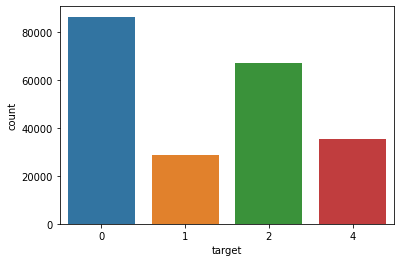

In [10]:
sns.countplot(x='target', data=target)

In [11]:
for i, j in enumerate(target['target']): # все три вида поломок превращаю в один вид поломок.
    if j != 0:
        target['target'][i] = int(1)

<AxesSubplot:xlabel='target', ylabel='count'>

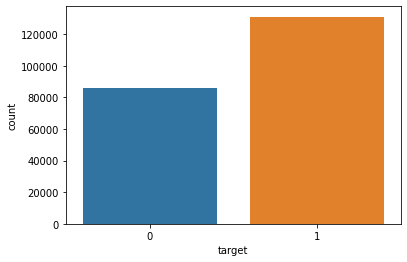

In [12]:
sns.countplot(x='target', data=target)

In [13]:
d['target_1'] = target['target'] # добавляю новую колонку, бинарный target

In [14]:
d

,ESP.Frequency,ESP.IntakePressure,ESP.IntakeTemperature,ESP.Motor.CurrentU,ESP.Motor.CurrentV,ESP.Motor.CurrentW,ESP.Motor.VoltageAB,ESP.Motor.VoltageBC,ESP.Motor.VoltageCA,Sediments.Lab.Man,...,diff_ESP.IntakePressure,diff_ESP.Frequency,diff_ESP.Motor.CurrentUnbalance,diff_ESP.Motor.Load,diff_ESP.Motor.Resistance,diff_ESP.Motor.Temperature,diff_ESP.Motor.VoltageUnbalance,diff_ESP.RatedVoltage,Power,target_1
0,52.4,68.937612,63.074368,46.0,46.316667,46.000000,0.000000,0.000000,0.000000,117.518605,...,-61.653193,-52.4,29.612527,-16.737334,-9408.897238,8.883248,-13.273234,-334.93391,0.000000,0
1,52.4,68.937612,89.000000,46.0,46.250000,46.016667,0.000000,0.000000,0.000000,117.518605,...,-61.653193,-52.4,29.612527,-16.737334,-6439.198101,-114.000000,-13.273234,-300.00000,0.000000,0
2,52.4,68.937612,89.000000,46.0,46.666667,46.000000,0.000000,0.000000,0.000000,117.518605,...,-61.653193,-52.4,29.612527,-16.737334,-6539.114862,-114.000000,-13.273234,-300.00000,0.000000,0
3,52.4,68.937612,89.000000,46.0,46.416667,46.016667,0.000000,0.000000,0.000000,117.518605,...,-61.653193,-52.4,29.612527,-16.737334,-6630.967593,-114.000000,-13.273234,-300.00000,0.000000,0
4,52.4,68.937612,89.000000,46.0,46.466667,46.116667,0.000000,0.000000,0.000000,117.518605,...,-61.653193,-52.4,29.612527,-16.737334,-6560.415598,-114.000000,-13.273234,-300.00000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217433,54.8,76.465741,88.000000,24.0,24.000000,24.000000,377.066667,377.283333,373.533333,117.518605,...,-46.465741,-54.8,19.000000,-18.135417,-9969.000000,-105.000000,-13.273234,-300.00000,35637.487937,1
217434,54.8,76.560000,88.000000,24.0,23.883333,24.000000,376.666667,377.050000,373.200000,117.518605,...,-46.560000,-54.8,19.000000,-18.046349,-9969.000000,-105.000000,-13.273234,-300.00000,35549.038880,1
217435,54.8,76.770833,88.000000,24.0,23.866667,24.000000,376.433333,376.366667,372.716667,117.518605,...,-46.770833,-54.8,19.000000,-18.236667,-9969.000000,-105.000000,-13.273234,-300.00000,35496.575050,1
217436,54.8,76.665000,88.000000,24.0,23.866667,24.000000,376.233333,376.033333,372.566667,117.518605,...,-46.665000,-54.8,19.000000,-18.232807,-9969.000000,-105.000000,-13.273234,-300.00000,35474.983913,1


In [15]:
d = d.sample(frac=1).reset_index(drop=True) # перетасовка строк фрейма

In [16]:
test, train = np.split(d, [int(.1*len(d))]) #разделение на тестовую и трейновую 

In [17]:
X_train = train.drop(["target", 'target_1'], axis=1)
y_train = train["target_1"]
len(y_train)

195695

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [19]:
cbc = CatBoostClassifier(eval_metric = 'Accuracy', 
                         use_best_model = True, 
                         random_seed = 42,
                         iterations=200)

In [20]:
features = np.where(X_train.dtypes != float)[0]

In [21]:
cbc.fit(X_train, y_train, 
        cat_features=features, 
        eval_set= (X_test, y_test), 
        early_stopping_rounds=100)

Learning rate set to 0.222354
0:	learn: 0.7191356	test: 0.7192826	best: 0.7192826 (0)	total: 306ms	remaining: 1m
1:	learn: 0.7633499	test: 0.7672909	best: 0.7672909 (1)	total: 479ms	remaining: 47.5s
2:	learn: 0.7991454	test: 0.8018856	best: 0.8018856 (2)	total: 703ms	remaining: 46.2s
3:	learn: 0.8105598	test: 0.8125144	best: 0.8125144 (3)	total: 874ms	remaining: 42.8s
4:	learn: 0.8188572	test: 0.8237564	best: 0.8237564 (4)	total: 1.08s	remaining: 42.2s
5:	learn: 0.8364930	test: 0.8384220	best: 0.8384220 (5)	total: 1.25s	remaining: 40.3s
6:	learn: 0.8449500	test: 0.8468535	best: 0.8468535 (6)	total: 1.46s	remaining: 40.3s
7:	learn: 0.8478436	test: 0.8497662	best: 0.8497662 (7)	total: 1.61s	remaining: 38.7s
8:	learn: 0.8624071	test: 0.8664503	best: 0.8664503 (8)	total: 1.82s	remaining: 38.7s
9:	learn: 0.8621771	test: 0.8650962	best: 0.8664503 (8)	total: 1.98s	remaining: 37.6s
10:	learn: 0.8710813	test: 0.8730933	best: 0.8730933 (10)	total: 2.22s	remaining: 38.1s
11:	learn: 0.8777115	test

95:	learn: 0.9755870	test: 0.9738368	best: 0.9738368 (95)	total: 21.9s	remaining: 23.7s
96:	learn: 0.9755742	test: 0.9735813	best: 0.9738368 (95)	total: 22s	remaining: 23.4s
97:	learn: 0.9755104	test: 0.9736324	best: 0.9738368 (95)	total: 22.2s	remaining: 23.1s
98:	learn: 0.9761747	test: 0.9743223	best: 0.9743223 (98)	total: 22.4s	remaining: 22.8s
99:	learn: 0.9765771	test: 0.9745522	best: 0.9745522 (99)	total: 22.6s	remaining: 22.6s
100:	learn: 0.9767559	test: 0.9746289	best: 0.9746289 (100)	total: 22.9s	remaining: 22.4s
101:	learn: 0.9767176	test: 0.9748077	best: 0.9748077 (101)	total: 23.2s	remaining: 22.3s
102:	learn: 0.9767687	test: 0.9750121	best: 0.9750121 (102)	total: 23.4s	remaining: 22s
103:	learn: 0.9769923	test: 0.9751654	best: 0.9751654 (103)	total: 23.6s	remaining: 21.7s
104:	learn: 0.9773947	test: 0.9754209	best: 0.9754209 (104)	total: 23.7s	remaining: 21.4s
105:	learn: 0.9780654	test: 0.9761108	best: 0.9761108 (105)	total: 23.9s	remaining: 21.2s
106:	learn: 0.9786275	te

188:	learn: 0.9892307	test: 0.9873528	best: 0.9873528 (188)	total: 41.8s	remaining: 2.43s
189:	learn: 0.9894351	test: 0.9873783	best: 0.9873783 (189)	total: 42.1s	remaining: 2.22s
190:	learn: 0.9893776	test: 0.9873783	best: 0.9873783 (189)	total: 42.3s	remaining: 1.99s
191:	learn: 0.9892051	test: 0.9873783	best: 0.9873783 (189)	total: 42.5s	remaining: 1.77s
192:	learn: 0.9892051	test: 0.9874550	best: 0.9874550 (192)	total: 42.6s	remaining: 1.55s
193:	learn: 0.9897225	test: 0.9876849	best: 0.9876849 (193)	total: 42.8s	remaining: 1.32s
194:	learn: 0.9898631	test: 0.9877871	best: 0.9877871 (194)	total: 43.1s	remaining: 1.1s
195:	learn: 0.9898950	test: 0.9878638	best: 0.9878638 (195)	total: 43.4s	remaining: 885ms
196:	learn: 0.9897481	test: 0.9877105	best: 0.9878638 (195)	total: 43.5s	remaining: 663ms
197:	learn: 0.9898311	test: 0.9877105	best: 0.9878638 (195)	total: 43.7s	remaining: 442ms
198:	learn: 0.9898056	test: 0.9876849	best: 0.9878638 (195)	total: 43.9s	remaining: 221ms
199:	learn:

In [22]:
cbc.score(X_test, y_test)

0.987863767597537

In [23]:
test_target = pd.DataFrame(test['target_1']) # правильные ответы тестовой выборки 

In [24]:
test = test.drop(["target", 'target_1'], axis=1) # удаляю ответы из тестовой выборки 

In [25]:
pred = cbc.predict(test) # предстказания на тестовой выборке 
pred

array([1, 0, 1, ..., 1, 0, 0])

In [26]:
len(pred) 
 

21743

In [27]:
pred_1 = pd.DataFrame(pred) # превращаю предстказанные значения в data frame для удобной конкатенации 

In [28]:
test_target['pred_target'] = pred_1[0] # конкатенирую правльные ответы тестовой выборки с предсказанными ответами 

In [29]:
l = [] # считаю количество не правильно класифицированных значений
for i in range(len(test_target['target_1'])):
    if test_target['target_1'][i] != test_target['pred_target'][i]:
        l.append(1)


In [30]:
len(l) # сколько не верно класифицированных значений из 21743

266

In [42]:
len(l) / 21743 * 100 # какой процент не верно класифицированных значений на данных которые модель не видела. 

1.2233822379616428

In [41]:
f"точность класификации {float('{:.1f}'.format(100 - (len(l) / 21743 * 100)))} %"

'точность класификации 98.8 %'